In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Final Results Table with Sensitivity:
                   Model  Accuracy  F1-score  Precision    Recall  Params (M)  \
0           Baseline CNN  0.697161  0.801653   0.671280  0.994872   11.169089   
1            Dropout CNN  0.712934  0.808017   0.686380  0.982051   11.169089   
2          BatchNorm CNN  0.634069  0.770751   0.627010  1.000000   11.170497   
3  Dropout+BatchNorm CNN  0.859200  0.858600   0.927673  0.800000   11.170497   
4               ResNet50  0.648265  0.773604   0.640336  0.976923   23.589761   
5            MobileNetV2  0.832808  0.878995   0.792181  0.987179    2.259265   
6            DenseNet121  0.850158  0.889919   0.811839  0.984615    7.038529   
7         EfficientNetB0  0.615142  0.761719   0.615142  1.000000    4.050852   
8            InceptionV3  0.829653  0.873832   0.802575  0.958974   21.804833   
9                  VGG16  0.741325  0.824034   0.708487  0.984615   14.715201   

   Train Time (mins)  Sensitivity  
0          14.645091     0.994872 

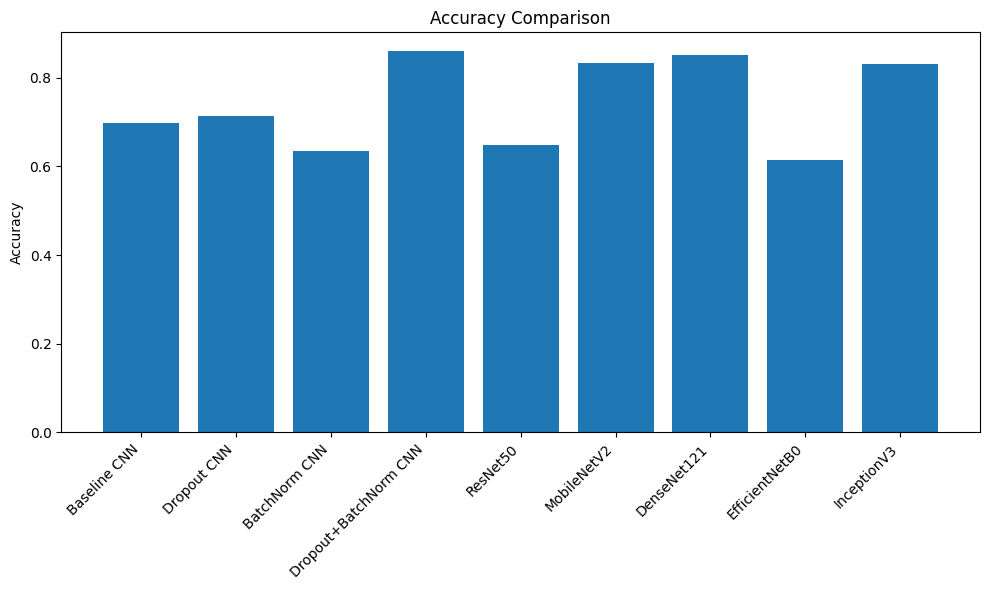

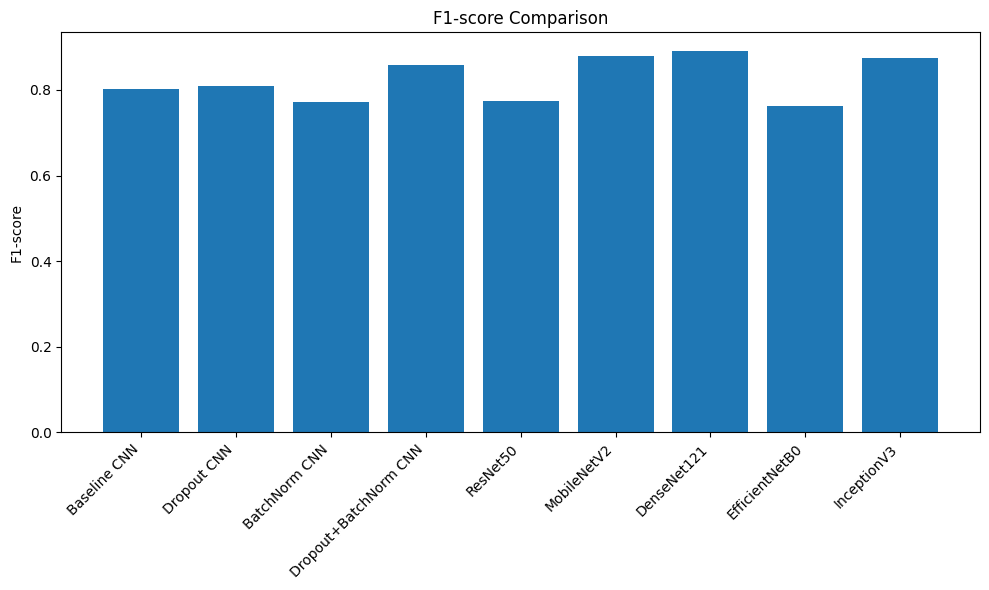

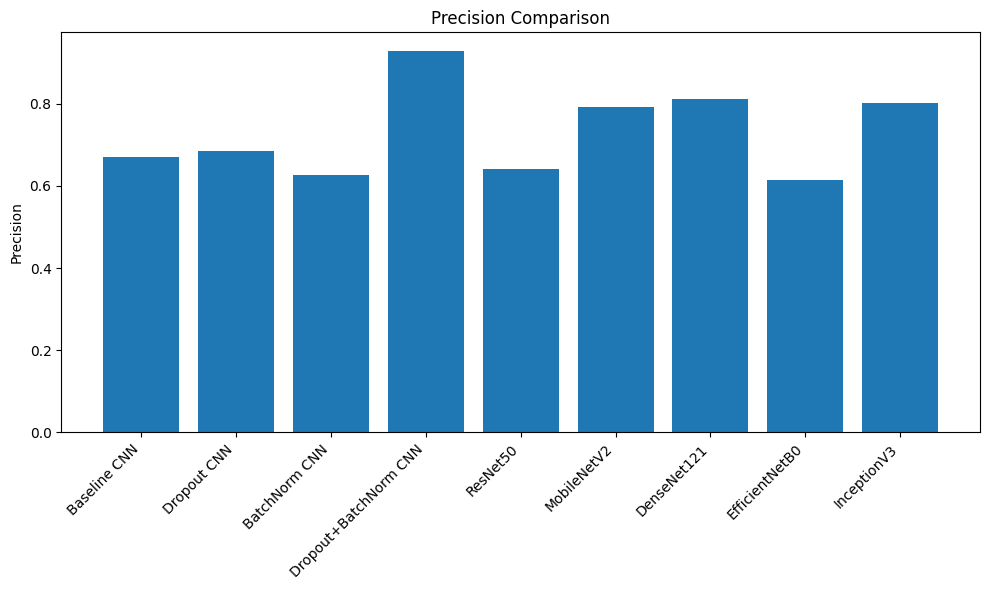

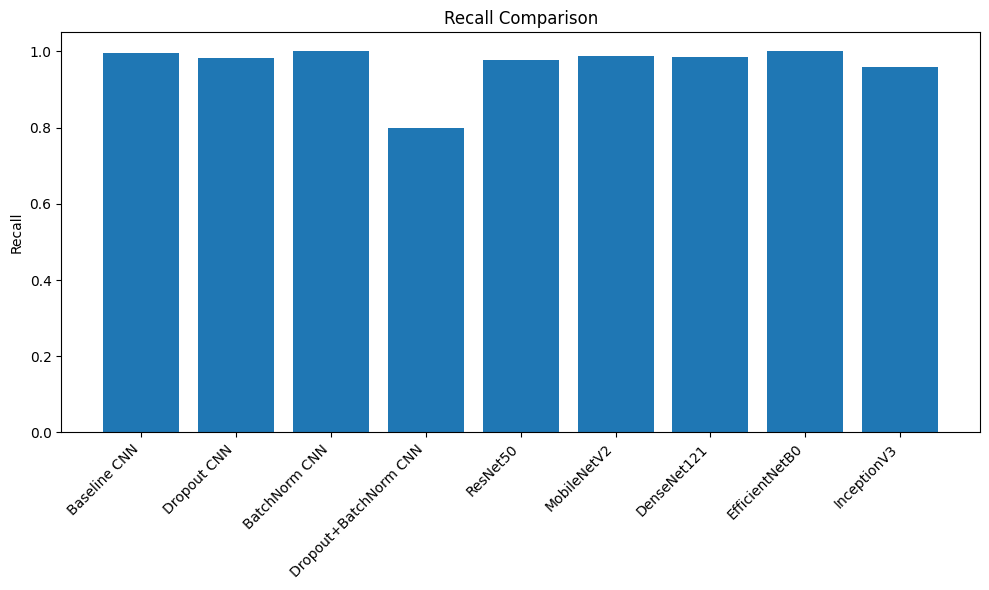

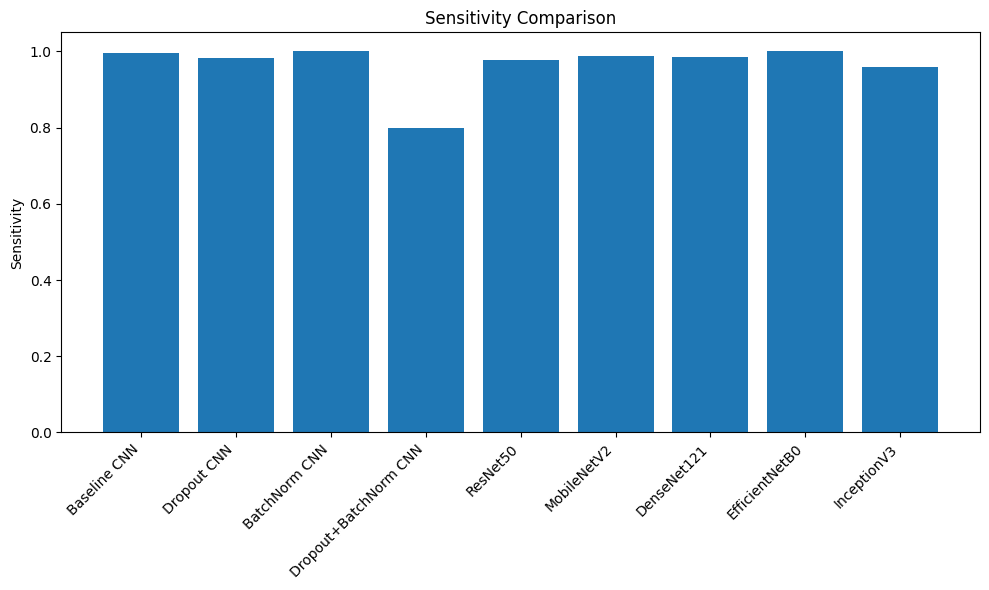

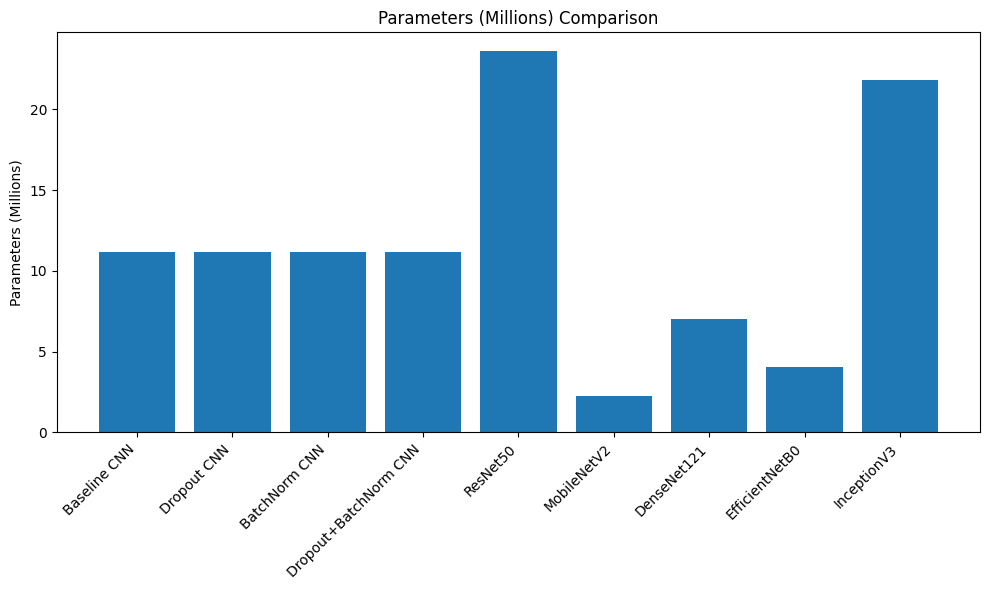

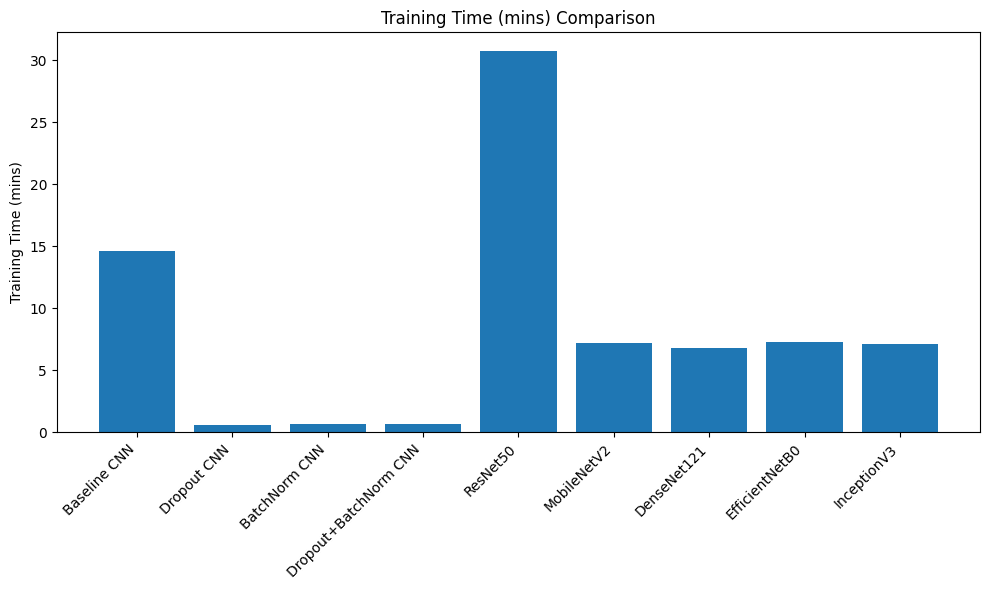

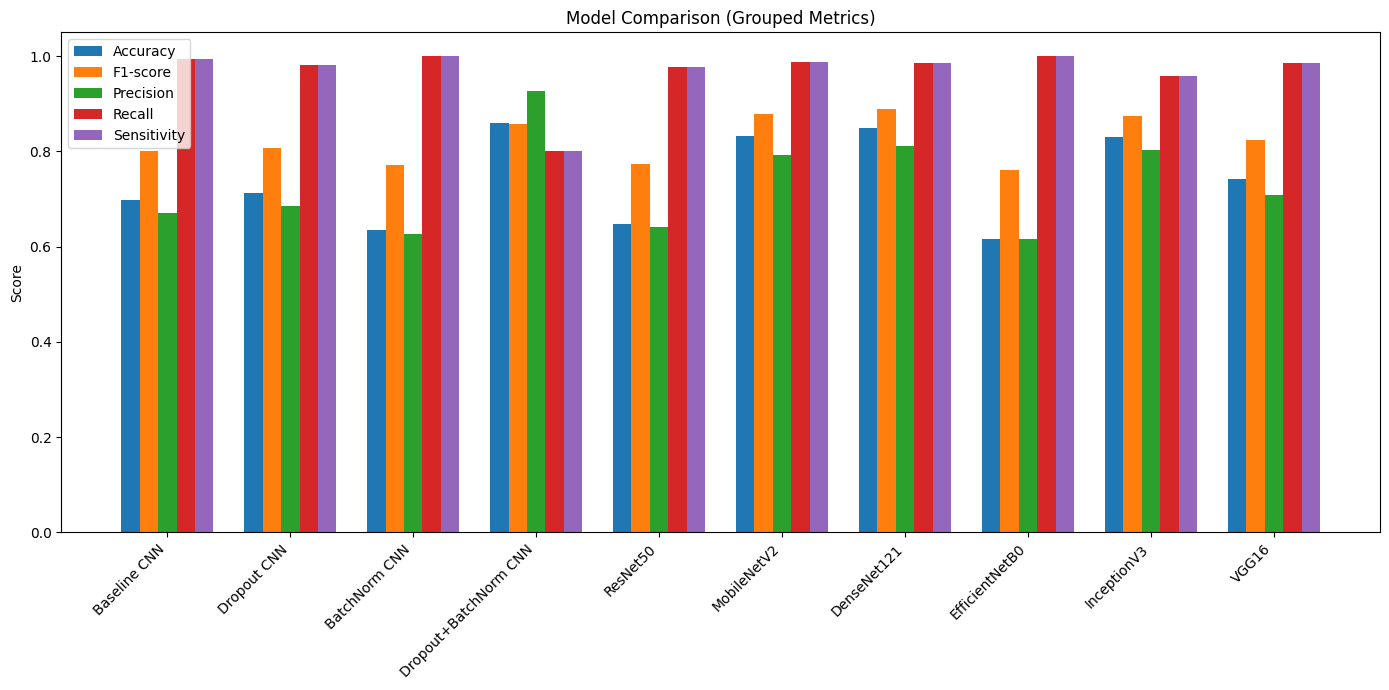

In [3]:
# ==========================
# Notebook 3: Graphs + Final Table (with Sensitivity + Grouped Bar Plot + Mean ± Std)
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# Load results
# ===============================
custom_df = pd.read_csv("/content/drive/MyDrive/PBL3/custom_results_summary.csv")
pretrained_df = pd.read_csv("/content/drive/MyDrive/PBL3/pretrained_results_summary.csv")

df = pd.concat([custom_df, pretrained_df], ignore_index=True)

# Add Sensitivity column (same as Recall)
df["Sensitivity"] = df["Recall"]

print("Final Results Table with Sensitivity:")
print(df)

# ===============================
# Compute Mean ± Std row
# ===============================
metrics = ["Accuracy", "F1-score", "Precision", "Recall", "Sensitivity", "Params (M)", "Train Time (mins)"]
summary_row = {}

summary_row["Model"] = "Mean ± Std"
for metric in metrics:
    mean_val = df[metric].mean()
    std_val = df[metric].std()
    summary_row[metric] = f"{mean_val:.4f} ± {std_val:.4f}"

# Append row
df_with_summary = pd.concat([df, pd.DataFrame([summary_row])], ignore_index=True)

print("\nFinal Table with Mean ± Std row:")
print(df_with_summary)

# ===============================
# Plotting utility
# ===============================
def plot_metric(df, metric, ylabel):
    plt.figure(figsize=(10,6))
    plt.bar(df["Model"][:-1], df[metric][:-1])  # skip mean ± std row
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Comparison")
    plt.tight_layout()
    plt.show()

# ===============================
# Individual Plots
# ===============================
plot_metric(df, "Accuracy", "Accuracy")
plot_metric(df, "F1-score", "F1-score")
plot_metric(df, "Precision", "Precision")
plot_metric(df, "Recall", "Recall")
plot_metric(df, "Sensitivity", "Sensitivity")
plot_metric(df, "Params (M)", "Parameters (Millions)")
plot_metric(df, "Train Time (mins)", "Training Time (mins)")

# ===============================
# Grouped Bar Plot (Accuracy, F1, Precision, Recall, Sensitivity)
# ===============================
metrics_to_compare = ["Accuracy", "F1-score", "Precision", "Recall", "Sensitivity"]

x = np.arange(len(df["Model"]))  # model indices (excluding summary row for grouped plot)
bar_width = 0.15

plt.figure(figsize=(14,7))
for i, metric in enumerate(metrics_to_compare):
    plt.bar(x + i*bar_width, df[metric], width=bar_width, label=metric)

plt.xticks(x + bar_width*2, df["Model"], rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Model Comparison (Grouped Metrics)")
plt.legend()
plt.tight_layout()
plt.show()

# ===============================
# Save final merged results
# ===============================
df_with_summary.to_csv("/content/final_results_summary.csv", index=False)
